<a href="https://colab.research.google.com/github/KareemKhaledd/text_emotion_detection/blob/main/Emotion_Detection_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-Based emotion detection 

In [ ]:
!pip install neattext
!pip install text_hammer 


     |████████████████████████████████| 114 kB 16.8 MB/s 
     |████████████████████████████████| 115 kB 33.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
# Load ML Pkgs
 
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers => vectorization 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer 
 
# metrics 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# to split the dataset to training and testing dataset 
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import text_hammer as th

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/emotion_dataset_raw.csv")

In [ ]:
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [ ]:
df.shape

(34792, 2)

In [ ]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [ ]:
df.drop(df[df.Emotion == "shame"].index, inplace=True)
df.drop(df[df.Emotion == "disgust"].index, inplace=True)
df.Emotion=df.Emotion.replace({"joy":0, 'sadness':1, "fear":2, "anger":3, "surprise":4, "neutral":5})

In [ ]:
df['Emotion'].value_counts()

0    11045
1     6722
2     5410
3     4297
4     4062
5     2254
Name: Emotion, dtype: int64

In [ ]:
from tensorflow.keras.utils import to_categorical
df['Emotion'] = to_categorical(df['Emotion'])

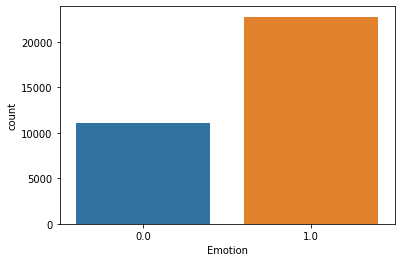

In [ ]:
# Plot
sns.countplot(x='Emotion',data=df)

In [ ]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

## Sentiment Analysis 

In [ ]:
! pip install textblob
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiement = blob.sentiment.polarity
    result = ""
    if sentiement > 0 :
        result = "Positive"
    elif sentiement < 0 :
        result = "Negative"
    else :
        result = "Neutral"
    return result 

In [ ]:
get_sentiment("i love programming")

'Positive'

In [ ]:
df2=df 
df2['Sentiment'] = df2["Text"].apply(get_sentiment)

In [ ]:
df2.head()

,Emotion,Text,Sentiment
0,1.0,Why ?,Neutral
1,0.0,Sage Act upgrade on my to do list for tommorow.,Neutral
2,1.0,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,0.0,Such an eye ! The true hazel eye-and so brill...,Positive
4,0.0,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [ ]:
# let's compare between emotions and sentiments 
df2.groupby(['Emotion','Sentiment']).size()

Emotion  Sentiment
0.0      Negative     1682
         Neutral      3648
         Positive     5715
1.0      Negative     6752
         Neutral      8424
         Positive     7569
dtype: int64

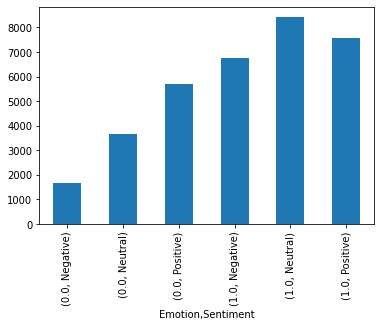

In [ ]:
df2.groupby(['Emotion','Sentiment']).size().plot(kind="bar")

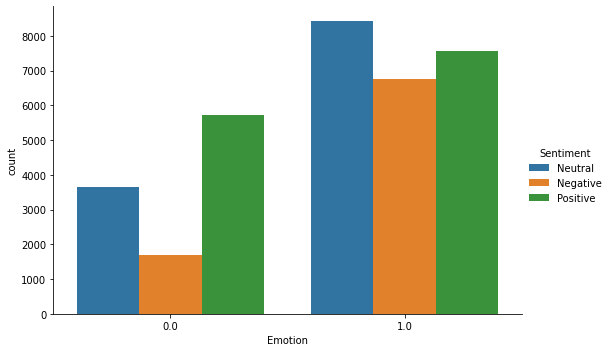

In [ ]:
# another way for plotting data 
sns.catplot(x="Emotion",hue="Sentiment",data=df2,kind="count",aspect=1.5)

## clean the Text 

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# User handles
df2['Clean_Text'] = df2['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:

df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_hashtags)

In [ ]:

df2['Clean_Text'] = df2['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
df2['Clean_Text'].str.replace(")","") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [ ]:
df2['Clean_Text'].str.replace("(","") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [ ]:
df2['Clean_Text'].str.replace(":","") 

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [ ]:
df2['Clean_Text'].str.replace("'","") 

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                                  Youu JEALOUSY   YOU
34791                                think baby dream time
Name: Clean_Text, Length: 33790, dtype: object

In [ ]:
df2.head()

,Emotion,Text,Sentiment,Clean_Text
0,1.0,Why ?,Neutral,
1,0.0,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,1.0,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,0.0,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,0.0,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...


## Keyword extraction 

- exract the most common word in each class 

In [ ]:
from collections import Counter 

In [ ]:
def extraxt_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

-let's check it , in a simple example on calculating the most common word in "joy" class 


In [ ]:
emotion_list = df2['Emotion'].unique().tolist()
print(emotion_list)

[1.0, 0.0]


In [ ]:
joy_list = df2[df2['Emotion']==0]['Clean_Text'].tolist()
for i in joy_list:
    print(i)

Streaming output truncated to the last 5000 lines.
stopped wish ya good night amp sweet dreams :) Happy friday amp
Thanks keeping til 3 morning
running solid 2 hours sleep
Hi brother appreciate talents aqnd love band started following todayany chance follow back
jumping good exercise :) thanks
Got work early Time start sociology essay
need break stop studying hour YAY
Managed run 30 Km skis fairly simply
nice day had minus middle part
Neighbours recalled Ms Bailey overjoyed birth daughter 
true wonderful advance people transformed wilderness home men women live comfortably  elegantly  happily  contented disposition
Headache headed cs work
received wedding invitation exflatmate enclosed small note overcame lot differences arisen circumstances left flat
quien le diga que cambiado ir al concierto de de la por ir la mata creo que arrepentire durante un largo tiempo
giving shows words cant plus brings smile amp anticipation
Head killing  practice tonight
xmas tree shopping
\Under 18\ Showju

In [ ]:
# make the list as a string so we can calculate the most common word 
joy_docx = ' '.join(joy_list)
print(joy_docx)

Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french   GoodLet   fell love \X\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome  brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming paper quarter re

In [ ]:
# extract the most common words in joy_docx 
key_dict = extraxt_keywords(joy_docx)
key_dict

{'2': 262,
 ':)': 311,
 'Christmas': 453,
 'God': 177,
 'Im': 555,
 'RT': 159,
 'amp': 678,
 'cant': 165,
 'class': 141,
 'day': 729,
 'days': 208,
 'excited': 145,
 'family': 181,
 'feel': 227,
 'feeling': 159,
 'felt': 167,
 'friend': 169,
 'friends': 155,
 'going': 304,
 'good': 345,
 'got': 328,
 'great': 194,
 'happy': 368,
 'home': 302,
 'hour': 172,
 'hours': 251,
 'it': 162,
 'joy': 258,
 'know': 177,
 'life': 252,
 'like': 476,
 'long': 204,
 'love': 393,
 'me': 197,
 'morning': 288,
 'new': 181,
 'night': 332,
 'people': 201,
 'right': 142,
 's': 180,
 'school': 297,
 'sleep': 185,
 'think': 148,
 'time': 604,
 'today': 471,
 'tomorrow': 467,
 'tonight': 205,
 'week': 231,
 'work': 510,
 'year': 225}

In [ ]:
import matplotlib.pylab as plt
# plot the most common word 
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['taken','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='taken',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

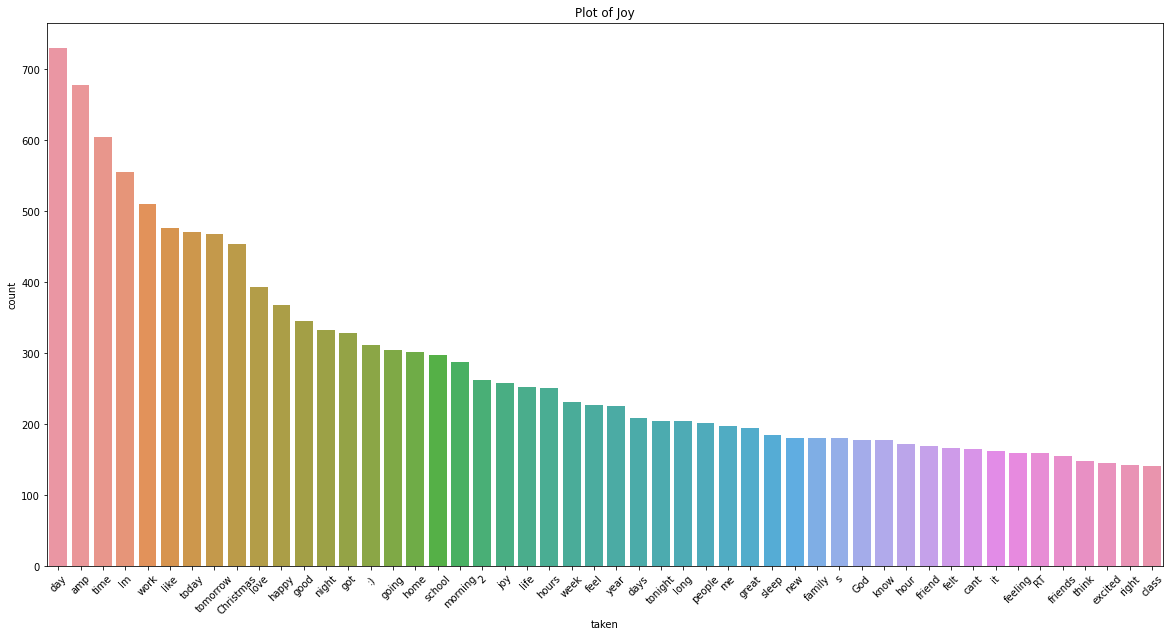

In [ ]:
plot_most_common_words(key_dict,"Joy")

{'Im': 1148, 'time': 926, 'like': 816, 'love': 760, 'today': 752, 'know': 716, 'day': 663, '’': 632, 'tomorrow': 621, 'afraid': 619, 'home': 610, 'got': 589, 'people': 587, 'me': 570, 'going': 547, 'night': 535, 'friend': 534, 's': 518, 'felt': 495, 'think': 490, ':(': 476, 'amp': 465, 'feel': 463, 'cant': 447, 'yesterday': 438, 'good': 430, 'sad': 430, 'it': 425, 'seen': 420, 'fear': 416, 'de': 412, 'work': 403, 'want': 403, 'en': 374, 'friends': 368, 'away': 368, 'u': 353, 'said': 349, 'way': 345, 'right': 340, 'told': 337, 'school': 337, 'angry': 335, 'life': 334, 'RT': 323, 'car': 317, 'thought': 315, 'face': 315, 'left': 304, 'een': 299}


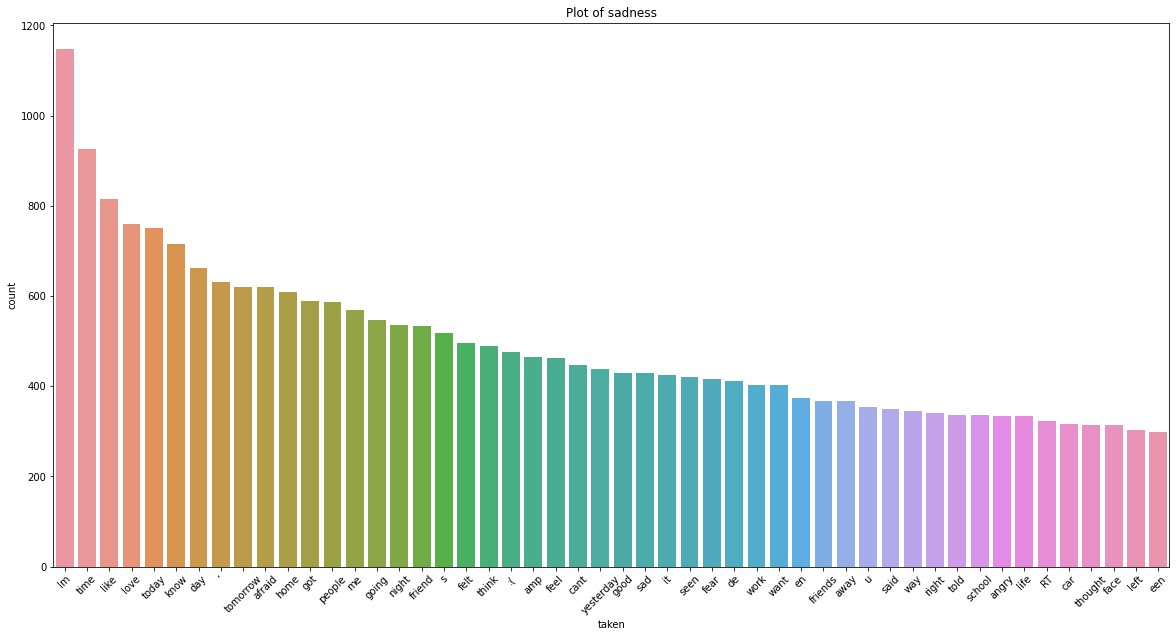

In [ ]:
sadness_list = df2[df2['Emotion']==1]['Clean_Text'].tolist() # get the list of emotion_category 
sadness_docx = ' '.join(sadness_list) # make it as one string 
key_dict_sadness = extraxt_keywords(sadness_docx) # count each word 
print(key_dict_sadness)
plot_most_common_words(key_dict_sadness,"sadness") # plot the results 

In [ ]:
# word cloud
#!pip install wordcloud
from wordcloud import WordCloud 

In [ ]:
def plot_wordcloud(docx):
    myWordCloud = WordCloud().generate(docx)
    plt.figure(figsize=(15,10))
    plt.imshow(myWordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

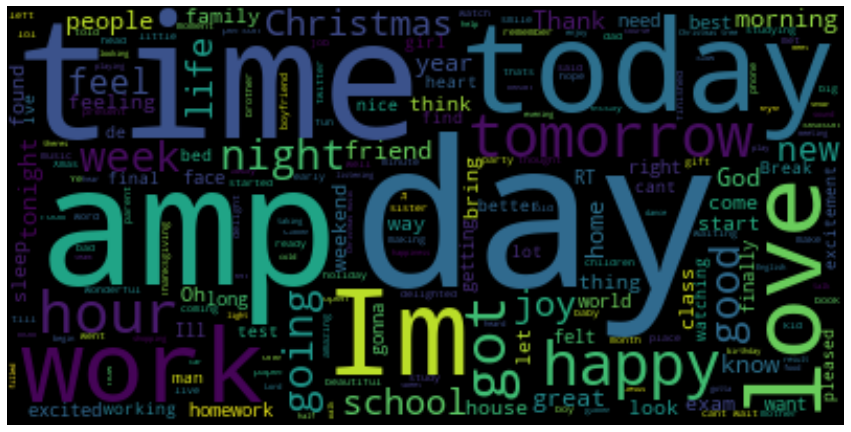

In [ ]:
plot_wordcloud(joy_docx)

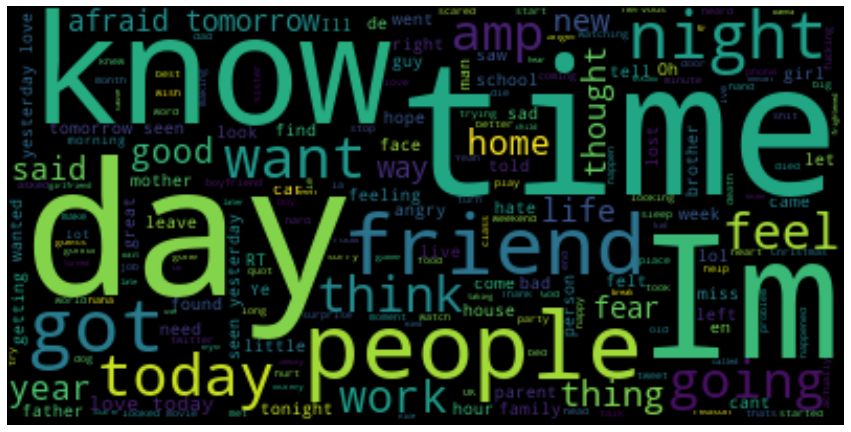

In [ ]:
plot_wordcloud(sadness_docx)

## Machine learning Text classification 

+ SVM 
+ naive bayes 
+ logestic regression 
+ KNN 
+ Descision tree 

+ compare with sparkNLP / NLU john snows lab 

In [ ]:
# Features & Labels
Xfeatures = df2['Clean_Text']
ylabels = df2['Emotion']
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(Xfeatures.head())
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(ylabels.head())

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0                                                     
1                       Sage Act upgrade list tommorow
2    WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3    eye  true hazel eyeand brilliant  Regular feat...
4    ugh babe hugggzzz u  babe naamazed nga ako e b...
Name: Clean_Text, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Emotion, dtype: float32


machine learning model cann't understand the text so we have to transfer the text to numbers , this process called vectorization 

In [ ]:
#vectorization 
cv = CountVectorizer()
x=cv.fit_transform(Xfeatures)

In [ ]:
# get features by name 
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12hours',
 '12hr',
 '12km',
 '12th',
 '12xbuild',
 '12xsmile',
 '12yea

In [ ]:
# to Dense Numpy array 
#x.toarray()

In [ ]:
#  Split the Dataset
x_train,x_test,y_train,y_test = train_test_split(x,ylabels,test_size=0.3,random_state=42)

## Build our model 


In [ ]:
# y_train = to_categorical(df.Sentiment.values)
# y_test = to_categorical(df_test.Sentiment.values)


## SVM

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
np.random.seed(610)

linearr = svm.SVC(kernel='linear', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinn = linearr.predict(x_test)
print("linear: ",accuracy_score(y_test,predictionslinn))

rbff = svm.SVC(kernel='rbf', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinnn = rbff.predict(x_test)
print("rbf: ",accuracy_score(y_test,predictionslinnn))


polyy = svm.SVC(kernel='poly', decision_function_shape='ovr').fit(x_train, y_train)
predictionslinp = polyy.predict(x_test)
print("poly: ",accuracy_score(y_test,predictionslinp))

sigg = svm.SVC(kernel='sigmoid', decision_function_shape='ovr').fit(x_train, y_train)
predictionslins = sigg.predict(x_test)
print("sig: ",accuracy_score(y_test,predictionslins))


linear:  0.7911610930255499
rbf:  0.7979678405839992
poly:  0.7138206569991121
sig:  0.7881029890500147


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:

print("acc: ",accuracy_score(y_test,y_pred))


acc:  0.789286771234093


## Naive Bayes

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# check the accuracy of the model 
# method 1 : 
nv_model.score(x_test,y_test)

0.7911610930255499

## logistic Regression

In [ ]:

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
# check the accuracy of the linear regression model 
lr_model.score(x_test , y_test)

0.8002367564368156

In [ ]:
def predict_emotion(text,model):
    # vectorizing the text that will be an input to the model
    vectorized_text = cv.transform(text).toarray() 
    prediction = model.predict(vectorized_text)
    prediction_probability = model.predict_proba(vectorized_text)
    prediction_percentage_for_all = dict(zip(model.classes_ , prediction_probability[0])) 
    print("Prediction:{}, Prediction score :{}".format(prediction[0],np.max(prediction_probability)))
    #return prediction_percentage_for_all
                                         
sample_test = ["i love artificial intelligence so much "] # text  to test the model with 
predict_emotion(sample_test,nv_model)



Prediction:1.0, Prediction score :0.8645504024219197


In [ ]:
# a single prediction using linear regression model 
sample_test2 = ["i love DEBI "] # text  to test the model with 
predict_emotion(sample_test2,lr_model) 

Prediction:1.0, Prediction score :0.6862010432607868


### Save the Model

In [ ]:
import joblib 

In [ ]:
model_file=open("Text_based_emotion_classifier_nv_model_26_april_2022.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()